In [36]:
#importing dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


## DF for liquour Sales

In [9]:
liquor_sales_df = pd.read_csv('Resources/weekly_sales.csv')
liquor_sales_df.head()

,Item,Item Code,Quantity,Unit Price,Total Sales Amount,date
0,RAIL Vodka,3339,46.0,4.826087,222.0,2019-02-15
1,PINT LKFT IPA,3136,44.0,3.579545,157.5,2019-02-15
2,SHOT Tullamore Dew,3327,38.0,4.000000,152.0,2019-02-15
3,PINT Spotted Cow,3140,36.0,3.750000,135.0,2019-02-15
4,PINT Miller High Life,3137,30.0,3.000000,90.0,2019-02-15


In [10]:
liquor_sales_df.Item.value_counts(normalize=True)

BTL Miller Lite         0.009240
BTL Bud Light           0.008662
CAN PBR 16oz            0.008085
SHOT Tullamore Dew      0.008085
PINT Stein              0.008085
                          ...   
LSF Beer of the Week    0.000064
Hacienda Reposado       0.000064
Cucumber Pimms Cup      0.000064
LSF STEIN               0.000064
J. Walker Red           0.000064
Name: Item, Length: 433, dtype: float64

In [11]:
liquor_sales_df.dtypes

Item                   object
Item Code               int64
Quantity              float64
Unit Price            float64
Total Sales Amount    float64
date                   object
dtype: object

In [12]:
liquor_sales_df['date'] = pd.to_datetime(liquor_sales_df['date'])
liquor_sales_df.dtypes

Item                          object
Item Code                      int64
Quantity                     float64
Unit Price                   float64
Total Sales Amount           float64
date                  datetime64[ns]
dtype: object

In [13]:
liquor_total_weekly_sales = liquor_sales_df.groupby(['date']).sum(['Quantity', 'Total Sales Amount'])
liquor_total_weekly_sales.drop(['Item Code', 'Unit Price'], inplace=True, axis=1)
liquor_total_weekly_sales.head()

,Quantity,Total Sales Amount
date,,
2019-02-15,569.0,2455.25
2019-02-22,1277.0,5790.00
2019-03-01,1541.0,6587.25
2019-03-08,1496.0,6543.50
2019-03-15,1551.0,6834.75


In [14]:
liquor_total_weekly_sales.iloc[:,0]

date
2019-02-15     569.0
2019-02-22    1277.0
2019-03-01    1541.0
2019-03-08    1496.0
2019-03-15    1551.0
               ...  
2021-08-20    1872.0
2021-08-27    1543.0
2021-09-03    1626.0
2021-09-10    1741.0
2021-09-17    1543.0
Name: Quantity, Length: 127, dtype: float64

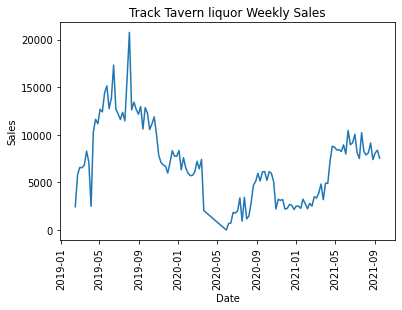

In [15]:
plt.plot(liquor_total_weekly_sales.index, liquor_total_weekly_sales['Total Sales Amount'])

# Create labels for the X and Y axis
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title('Track Tavern liquor Weekly Sales')
plt.xticks(rotation=90)

# Save and display the chart
#plt.savefig("")
plt.show()

## DF for Complete Sales (food and liquor)

In [16]:
complete_sales_df = pd.read_csv('Resources/weekly_sales_complete.csv')
complete_sales_df.head()

,Item,Item Code,Quantity,Unit Price,Total Sales Amount,date
0,PINT Spotted Cow,3140,64.0,3.937500,252.00,2021-01-08
1,DBL RAIL Vodka,3455,37.0,4.945946,183.00,2021-01-08
2,BTL Miller High Life,3122,31.0,3.250000,100.75,2021-01-08
3,PINT Stein,3141,29.0,3.517241,102.00,2021-01-08
4,SHOT Seagrams VO,3325,26.0,2.423077,63.00,2021-01-08


In [17]:
complete_sales_df.dtypes

Item                   object
Item Code               int64
Quantity              float64
Unit Price            float64
Total Sales Amount    float64
date                   object
dtype: object

In [18]:
complete_sales_df['date'] = pd.to_datetime(complete_sales_df['date'])
complete_sales_df.dtypes

Item                          object
Item Code                      int64
Quantity                     float64
Unit Price                   float64
Total Sales Amount           float64
date                  datetime64[ns]
dtype: object

In [19]:
complete_total_weekly_sales = complete_sales_df.groupby(['date']).sum(['Quantity', 'Total Sales Amount'])
complete_total_weekly_sales.drop(['Item Code', 'Unit Price'], inplace=True, axis=1)
complete_total_weekly_sales.head()

,Quantity,Total Sales Amount
date,,
2019-02-15,798.0,3788.57
2019-02-22,1846.0,9326.50
2019-03-01,2033.0,9667.55
2019-03-08,2113.0,10531.50
2019-03-15,2172.0,10667.33


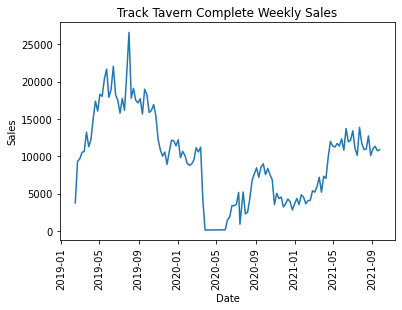

In [49]:
plt.plot(complete_total_weekly_sales.index, complete_total_weekly_sales['Total Sales Amount'])

# Create labels for the X and Y axis
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title('Track Tavern Complete Weekly Sales')
plt.xticks(rotation=90)

# Save and display the chart
#plt.savefig("")
plt.show()

## DF for Just Food Sales

In [26]:
liquor_total_weekly_sales.rename(columns={'Quantity': "Licor_Qty", 'Total Sales Amount': 'Licor_Sales_Amount'}, inplace=True)

In [27]:
join_complete_liquor = complete_total_weekly_sales.join(liquor_total_weekly_sales, how='outer')
join_complete_liquor.head()

,Quantity,Total Sales Amount,Licor_Qty,Licor_Sales_Amount
date,,,,
2019-02-15,798.0,3788.57,569.0,2455.25
2019-02-22,1846.0,9326.50,1277.0,5790.00
2019-03-01,2033.0,9667.55,1541.0,6587.25
2019-03-08,2113.0,10531.50,1496.0,6543.50
2019-03-15,2172.0,10667.33,1551.0,6834.75


In [30]:
# Create a df for just food sales
join_complete_liquor['Food_Qty'] = join_complete_liquor['Quantity'] - join_complete_liquor['Licor_Qty']
join_complete_liquor['Food_Sales_Amount'] = join_complete_liquor['Total Sales Amount'] - join_complete_liquor['Licor_Sales_Amount']
food_total_weekly_sales = join_complete_liquor.drop(['Quantity', 'Licor_Qty', 'Total Sales Amount', 'Licor_Sales_Amount'  ], axis=1)
food_total_weekly_sales.head()

,Food_Qty,Food_Sales_Amount
date,,
2019-02-15,229.0,1333.32
2019-02-22,569.0,3536.50
2019-03-01,492.0,3080.30
2019-03-08,617.0,3988.00
2019-03-15,621.0,3832.58


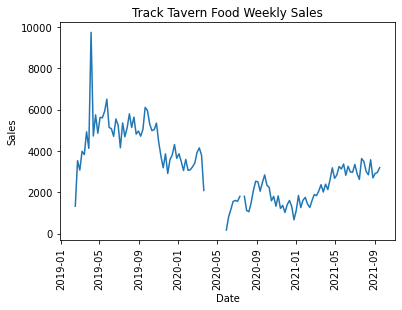

In [31]:
plt.plot(food_total_weekly_sales.index, food_total_weekly_sales['Food_Sales_Amount'])

# Create labels for the X and Y axis
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title('Track Tavern Food Weekly Sales')
plt.xticks(rotation=90)

# Save and display the chart
#plt.savefig("")
plt.show()

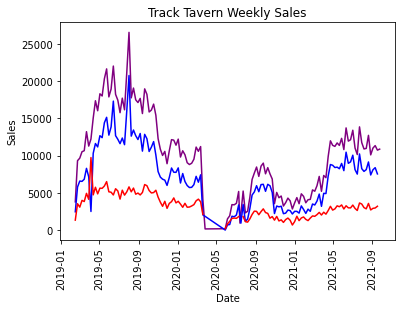

In [53]:
plt.plot(complete_total_weekly_sales.index, complete_total_weekly_sales['Total Sales Amount'], color='purple', label='Total Sales')
plt.plot(liquor_total_weekly_sales.index, liquor_total_weekly_sales['Licor_Sales_Amount'], color='blue', label='Total Sales')
plt.plot(food_total_weekly_sales.index, food_total_weekly_sales['Food_Sales_Amount'], color='red', label='Food Sales')

# Create labels for the X and Y axis
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title('Track Tavern Weekly Sales')
plt.xticks(rotation=90)

# Save and display the chart
#plt.savefig("")
plt.show()

## Pie Chart of Total Sales

In [45]:
liquor = liquor_total_weekly_sales['Licor_Sales_Amount'].sum()
food = food_total_weekly_sales['Food_Sales_Amount'].sum()
total = liquor + food
liquor_pct = liquor/total *100
food_pct = food/total *100
food_pct

31.05783926927561

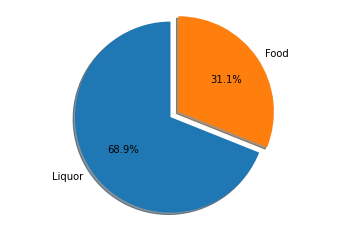

In [46]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Liquor', 'Food'
sizes = [liquor_pct, food_pct]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Word Cloud

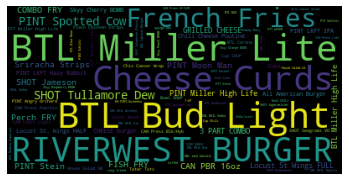

In [42]:
data = complete_sales_df.Item.value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()